In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("C:\\Users\\Asus\\Desktop\\disease prediction\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [7]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [8]:
df.groupby('Age')['DiabetesPedigreeFunction'].mean()

Age
21    0.433825
22    0.430625
23    0.438579
24    0.393565
25    0.600500
26    0.413455
27    0.471750
28    0.459629
29    0.408897
30    0.367238
31    0.589583
32    0.613250
33    0.734176
34    0.649857
35    0.454000
36    0.472875
37    0.414632
38    0.413938
39    0.605917
40    0.376077
41    0.396273
42    0.388000
43    0.450846
44    0.668375
45    0.496467
46    0.426846
47    0.355333
48    0.456800
49    0.612000
50    0.470125
51    0.615250
52    0.505375
53    0.550600
54    0.465500
55    0.226500
56    0.936667
57    0.704000
58    0.554714
59    0.252667
60    0.436800
61    0.613000
62    0.565500
63    0.249250
64    0.409000
65    0.259000
66    0.408500
67    0.602000
68    0.587000
69    0.413000
70    0.235000
72    0.832000
81    0.460000
Name: DiabetesPedigreeFunction, dtype: float64

In [9]:
df.groupby('Outcome')['DiabetesPedigreeFunction'].mean()

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
df.groupby('Outcome')['DiabetesPedigreeFunction'].mean()

Outcome
0    0.429734
1    0.550500
Name: DiabetesPedigreeFunction, dtype: float64

In [12]:
df.DiabetesPedigreeFunction.value_counts()

DiabetesPedigreeFunction
0.258    6
0.254    6
0.207    5
0.261    5
0.259    5
        ..
0.565    1
0.118    1
0.177    1
0.176    1
0.295    1
Name: count, Length: 517, dtype: int64

In [13]:
diabetes_counts = df["Outcome"].value_counts()
print(diabetes_counts)

Outcome
0    500
1    268
Name: count, dtype: int64


In [14]:
X = df.drop(['Outcome'],axis = 1)
y = df['Outcome']
print(f'X = {X.shape},y = {y.shape}')

X = (768, 8),y = (768,)


In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,stratify=y,random_state= 0)

In [16]:
print(f'X_train_shape = {X_train.shape},X_test_shape = {X_test.shape}')

X_train_shape = (614, 8),X_test_shape = (154, 8)


In [17]:
classifier = svm.SVC(kernel='linear')

In [18]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
X_train = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train,y_train )

In [20]:
print('Accuracy score of the test data :', training_data_accuracy)

Accuracy score of the test data : 0.7752442996742671


In [21]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report

Text(0.5, 1.0, 'Confusion Matrix- svm Classifier ')

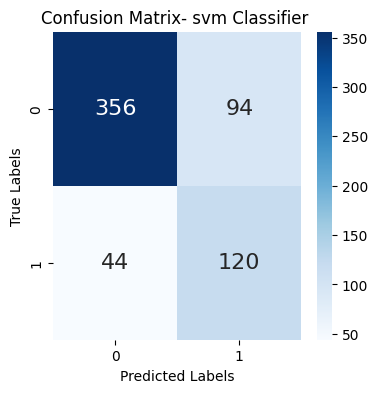

In [22]:
cm_train=confusion_matrix(X_train, y_train)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- svm Classifier ')

In [23]:
import pickle

In [24]:
filename = 'diabetes_model.sav'
pickle.dump(classifier,open(filename,'wb'))